In [3]:
import matplotlib.pyplot as plt
import pandas as pd

gapminder = pd.read_csv("https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv")
gapminder.shape

(1704, 6)

In [4]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [6]:
gapminder_1997 = gapminder[gapminder["year"] == 1997]
gapminder_1997.shape

(142, 6)

In [0]:
grouped = gapminder_1997.groupby("continent")
country_counts_ser = grouped["country"].count().sort_values(ascending=False)

In [8]:
country_counts_ser.index

Index(['Africa', 'Asia', 'Europe', 'Americas', 'Oceania'], dtype='object', name='continent')

In [9]:
country_counts_ser.values

array([52, 33, 30, 25,  2])

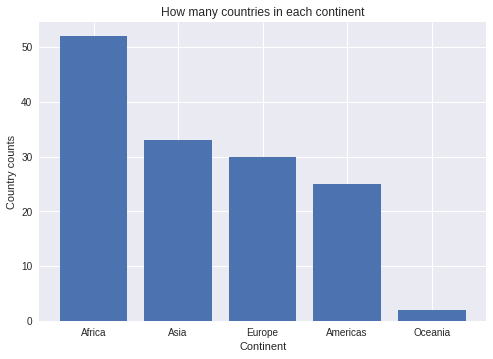

In [10]:
continent_cnts = len(country_counts_ser.values)
plt.bar(range(continent_cnts), country_counts_ser.values)
plt.xticks(range(continent_cnts), country_counts_ser.index)
plt.title("How many countries in each continent")
plt.xlabel("Continent")
plt.ylabel("Country counts")
plt.show()

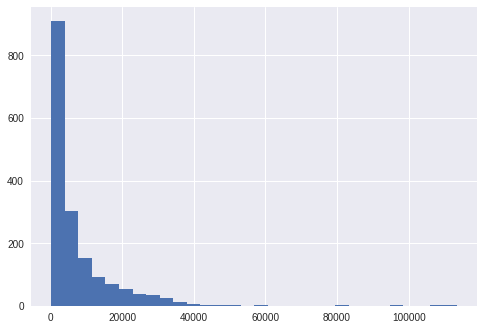

In [14]:
gdpPercap = gapminder["gdpPercap"]
plt.hist(gdpPercap, bins=30)
plt.show()

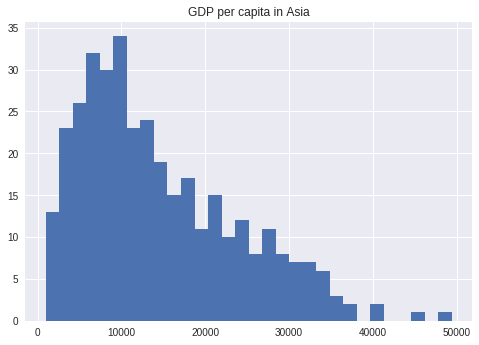

In [17]:
asia = gapminder[gapminder["continent"] == "Europe"]
plt.hist(asia["gdpPercap"], bins=30)
plt.title("GDP per capita in Asia")
plt.show()

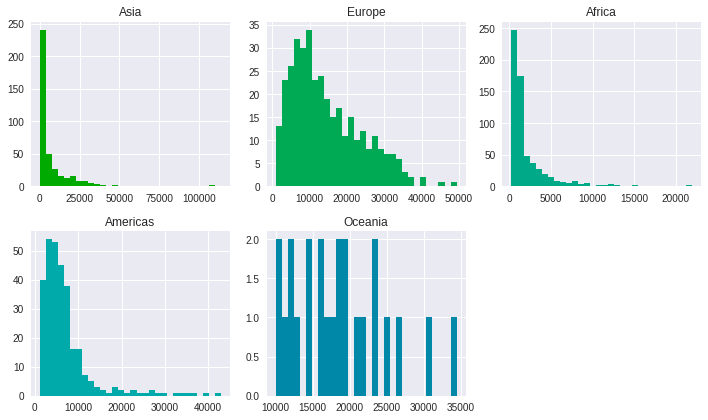

In [18]:
figure, axis = plt.subplots(2, 3, figsize=(10, 6))

row_indice = [0, 0, 0, 1, 1]
col_indice = [0, 1, 2, 0, 1]
continents = gapminder["continent"].unique()
hist_colors = ["#00AA00", "#00AA55", "#00AA88", "#00AAAA", "#0088A8"]
for ridx, cidx, cont, col in zip(row_indice, col_indice, continents, hist_colors):
  subset_df = gapminder[gapminder["continent"] == cont]
  axis[ridx, cidx].hist(subset_df["gdpPercap"], bins=30, color=col)
  axis[ridx, cidx].set_title(cont)
axis[1, 2].set_visible(False)
plt.tight_layout()
plt.show()

In [19]:
type(axis)

numpy.ndarray

In [20]:
axis.shape

(2, 3)

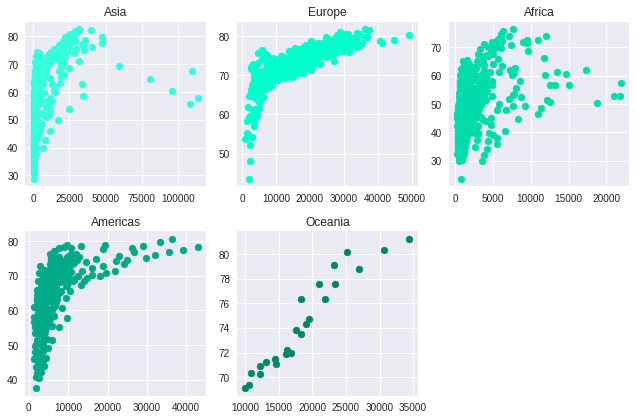

In [21]:
figure, axis = plt.subplots(2, 3, figsize=(9, 6))

row_indice = [0, 0, 0, 1, 1]
col_indice = [0, 1, 2, 0, 1]
continents = gapminder["continent"].unique()
hex_colors = ["#33FFDD", "#00FFCC", "#00DDAA", "#00AA88", "#008866"]
for ridx, cidx, cont, col in zip(row_indice, col_indice, continents, hex_colors):
  subset_df = gapminder[gapminder["continent"] == cont]
  axis[ridx, cidx].scatter(subset_df["gdpPercap"], subset_df["lifeExp"], color=col)
  axis[ridx, cidx].set_title(cont)
axis[1, 2].set_visible(False)
plt.tight_layout()
plt.show()

In [0]:
gapminder[gapminder["continent"] == "Europe"]["country"].unique()

array(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom'],
      dtype=object)

In [0]:
gapminder[gapminder["continent"] == "Asia"]["country"].unique()

array(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China',
       'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait',
       'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
       'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore',
       'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Vietnam',
       'West Bank and Gaza', 'Yemen, Rep.'], dtype=object)

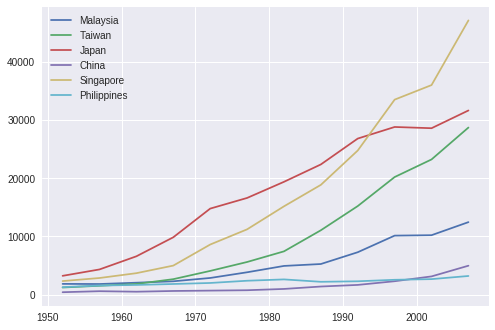

In [24]:
Malaysia = gapminder[gapminder["country"] == "Malaysia"]
taiwan = gapminder[gapminder["country"] == "Taiwan"]
Japan = gapminder[gapminder["country"] == "Japan"]
china = gapminder[gapminder["country"] == "China"]
Singapore = gapminder[gapminder["country"] == "Singapore"]
Philippines = gapminder[gapminder["country"] == "Philippines"]
plt.plot(Malaysia["year"], Malaysia["gdpPercap"], label = "Malaysia")
plt.plot(taiwan["year"], taiwan["gdpPercap"], label = "Taiwan")
plt.plot(Japan["year"], Japan["gdpPercap"], label = "Japan")
plt.plot(china["year"], china["gdpPercap"], label = "China")
plt.plot(Singapore["year"], Singapore["gdpPercap"], label = "Singapore")
plt.plot(Philippines["year"], Philippines["gdpPercap"], label = "Philippines")
plt.legend()
plt.show()

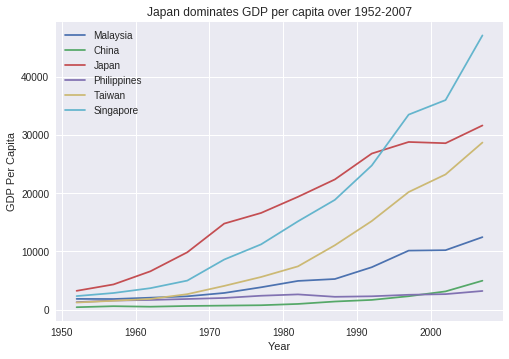

In [25]:
country_list = ["Malaysia", "China", "Japan", "Philippines", "Taiwan", "Singapore"]
for country in country_list:
  subset_df = gapminder[gapminder["country"] == country]
  plt.plot(subset_df["year"], subset_df["gdpPercap"], label = country)
plt.legend()
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.title("Japan dominates GDP per capita over 1952-2007")
plt.show()